In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# f(x) = x^2 + log(x)

def fun(x):
  return (x*x + math.log(x))


# First Degree Taylor Polynomial of  f(x) = f(a) + f'(a).(x-a)  around x = a
# For f(x) = x^2 + log(x),
#     L(x) = a^2 + log(a) + (2a + 1/a).(x-a)

# Given a = 1,
#     L(x) = 1 + (2 + 1)(x-1)

def lnrTaylor(x):
  return (1 + 3*(x-1))


# Second Degree Taylor Polynomial of  f(x) = f(a) + f'(a).(x-a) + f''(a)((x-a)^2)/2
# For f(x) = x^2 + log(x),
#     Q(x) = a^2 + log(a) + (2a + 1/a).(x-a) + (2 - 1/a^2)((x-a)^2)/2

# Given a = 1,
#     Q(x) = 1 + (2 + 1)(x-1) + (2 - 1)((x-1)^2)/2 = L(x) + (2 - 1)((x-1)^2)/2

def quadTaylor(x):
  return (lnrTaylor(x) + ((x-1)*(x-1))/2.0)

In [3]:
# x-axis range = [0,2]
# Starting point of x-axis range assumed 0.001 since domain of log(x) is x>0
xarr = np.arange(0.001,2,0.001)
fx = []
lx = []
qx = []

In [4]:
for i in xarr:
  fx.append(fun(i))
  lx.append(lnrTaylor(i))
  qx.append(quadTaylor(i))

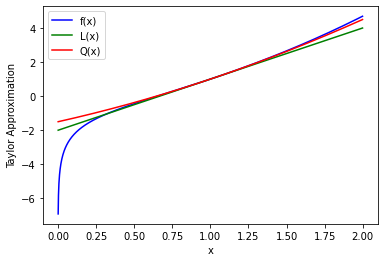

In [5]:
plt.plot(xarr,fx,color='b',label='f(x)')
plt.plot(xarr,lx,color='g',label='L(x)')
plt.plot(xarr,qx,color='r',label='Q(x)')
plt.legend()
plt.xlabel("x")
plt.ylabel("Taylor Approximation")
plt.show()

In [6]:
# Define error functions eL(x) = f(x) - L(x)
#                   and  eQ(x) = f(x) - Q(x)

def el(x):
  return (fun(x) - lnrTaylor(x))

def eq(x):
  return (fun(x) - quadTaylor(x))


# Define functions f1(x) = eL(x)/(x-1)
#             and  f2(x) = eQ(x)/(x-1)^2

def f1(x):
  return (el(x)/(float(x-1)))

def f2(x):
  return (eq(x)/(float((x-1)*(x-1))/2.0))

In [7]:
# er1[] --> array for eL(x)
# er2[] --> array for eQ(x)

er1 = []
er2 = []

In [8]:
for i in xarr:
  er1.append(f1(i))
  er2.append(f2(i))

/var/folders/fx/m8jghh2j0xn7xvzxjj0rz1sr0000gn/T/ipykernel_58601/4042175320.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return (el(x)/(float(x-1)))
/var/folders/fx/m8jghh2j0xn7xvzxjj0rz1sr0000gn/T/ipykernel_58601/4042175320.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (eq(x)/(float((x-1)*(x-1))/2.0))


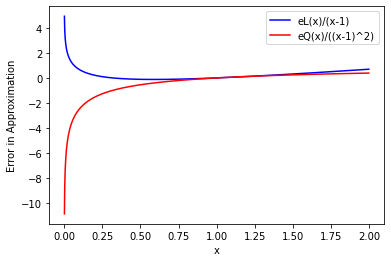

In [9]:
plt.plot(xarr,er1,color='b',label='eL(x)/(x-1)')
plt.plot(xarr,er2,color='r',label='eQ(x)/((x-1)^2)')
plt.legend()
plt.xlabel("x")
plt.ylabel("Error in Approximation")
plt.show()